# Importing Dataset

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
df=pd.read_csv(r'C:\Users\HP-15\Data Trained Projects\Advertising.csv')
#Visualizing first 5 rows of dataset
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Checking Null Values in the DataFrame

In [3]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

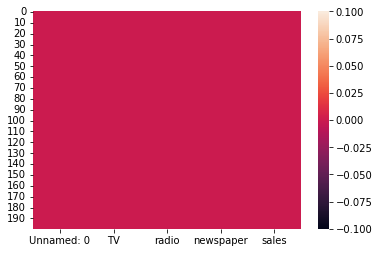

In [4]:
sns.heatmap(df.isnull())

We can see that there are no null values in the dataset

# Visualization of Data

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

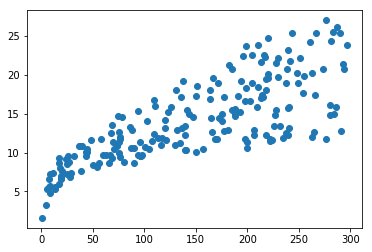

In [6]:
plt.scatter(df["TV"],df["sales"])
plt.show()

We can see positive linear correlation between TV and sales data

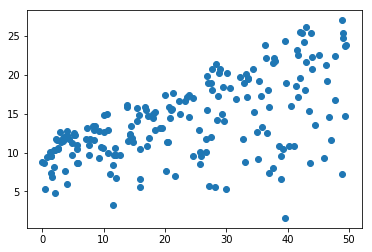

In [8]:
plt.scatter(df["radio"],df["sales"])
plt.show()

Here also the radio data is almost positively correlated with sales data

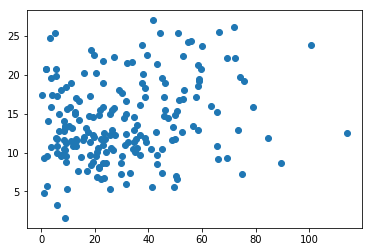

In [9]:
plt.scatter(df["newspaper"],df["sales"])
plt.show()

The data here is scattered and does not show much correlation between newspaper and sales data

(array([47., 41., 35., 30., 21., 13.,  9.,  2.,  1.,  1.]),
 array([  0.3 ,  11.67,  23.04,  34.41,  45.78,  57.15,  68.52,  79.89,
         91.26, 102.63, 114.  ]),
 <a list of 10 Patch objects>)

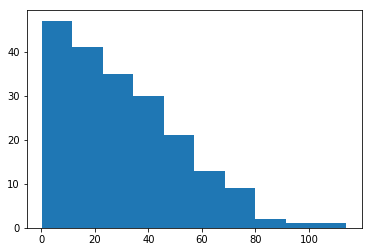

In [10]:
plt.hist(df['newspaper'],bins=10)

We can see that more the newspaper score less the sales score

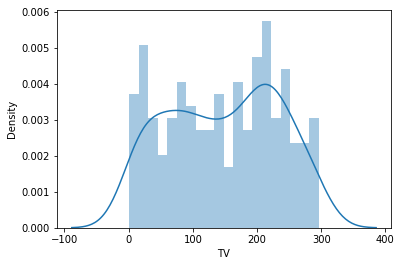

In [15]:
sns.distplot(df['TV'],bins=20)

Data lies between values 0 to 300 and has a normal distribution

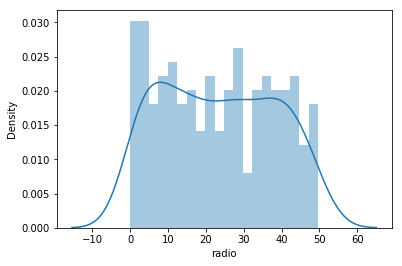

In [16]:
sns.distplot(df['radio'],bins=20)

Data lies between values 0 to 50 and shows a normal distribution

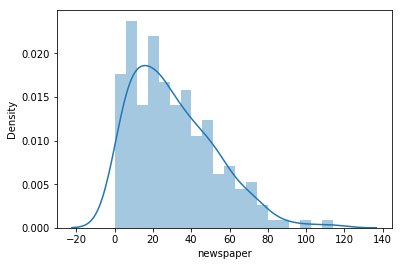

In [17]:
sns.distplot(df['newspaper'],bins=20)

Data lies between values 0 to 110 and shows a lightly right skewed data.

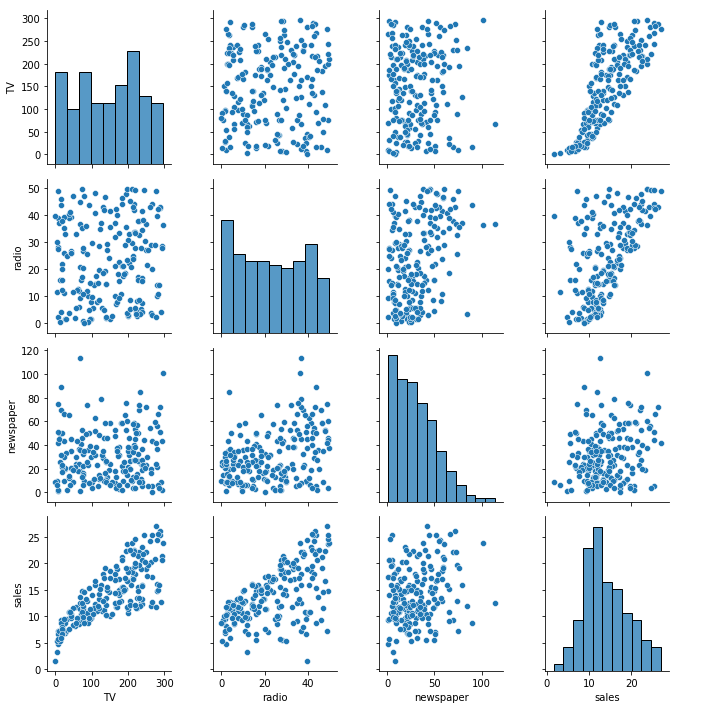

In [21]:
sns.pairplot(df)

We can observe that column unknown is of no importance. So we drop the column.

In [34]:
df.drop('Unnamed: 0',axis=1,inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [35]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Describe Data

In [36]:
df.shape

(200, 4)

In [37]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


We can see all values are in float data type

In [39]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


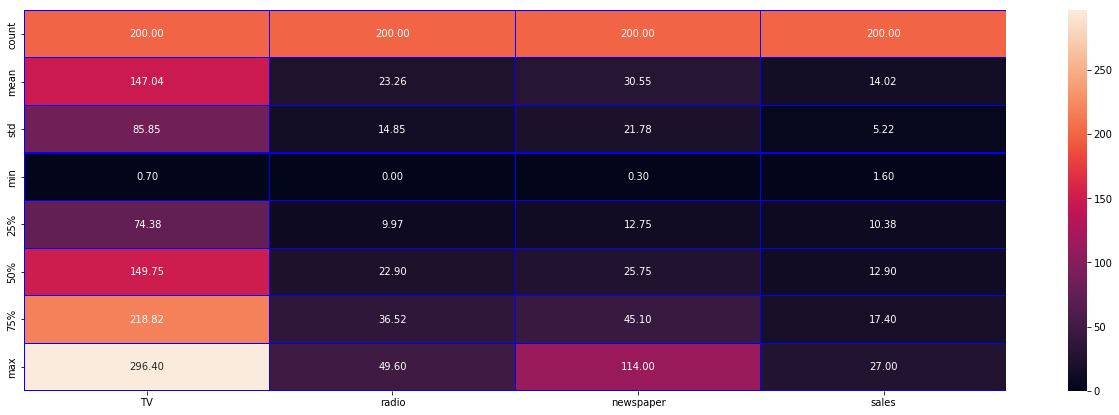

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='blue',fmt='0.2f')

Values for TV:
    
    Min= 0.70
    Max=296.40
    Mean=147.04
    Median=149.75
    
Values for Radio:
    
    Min= 0.00
    Max=49.60
    Mean=23.26
    Median=22.90
    
Values for Newspaper:
    
    Min= 0.30
    Max=114.00
    Mean=30.55
    Median=25.75
    
Hence, we can see huge variations in the min and max values of the dataset. The dataset is broadly scattered.
    

    
 

# Correlation of Columns with the Target Variable

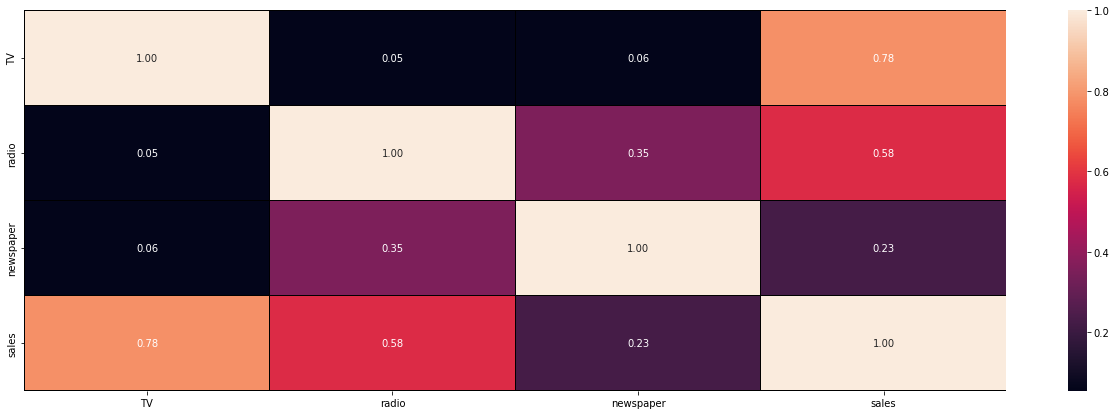

In [41]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

From the above heatmap, we can observe that the most correlated column with the target variable is TV with 78% of data and the least correlated column is newspaper with 23%.

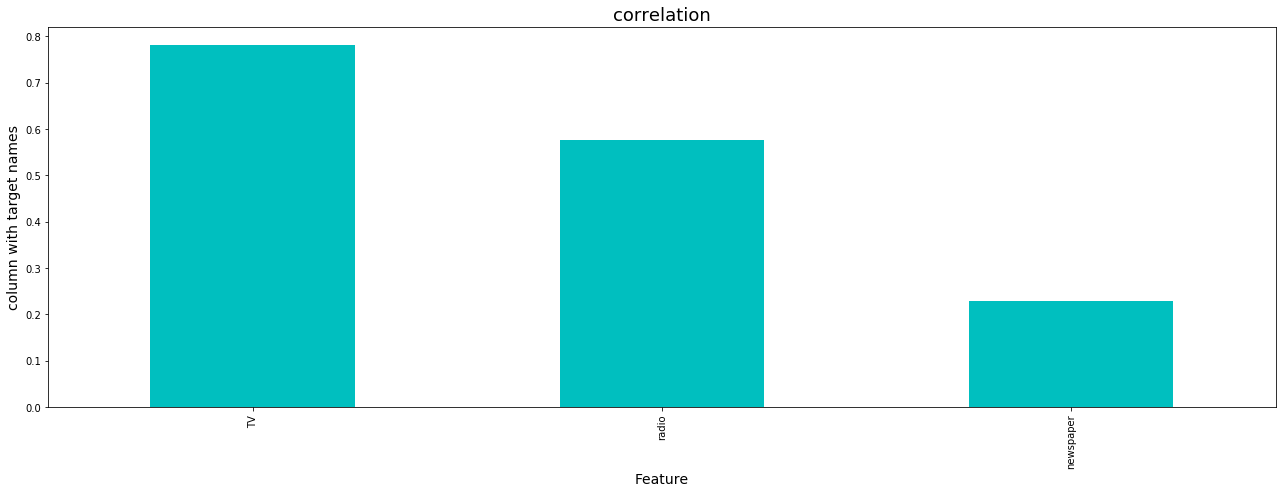

In [42]:
plt.figure(figsize=(22,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

We can observe that all columns in our dataset are positively correlated with our target variable.

# Checking Skewness

In [43]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Keeping threshold +/-0.5 as the range for skewness, we can see that only Newspaper column is lightly skewed.


# Checking Outliers

In [44]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

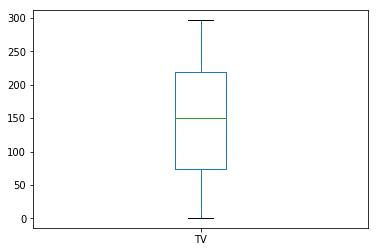

In [45]:
df['TV'].plot.box()

We cannot see any outliers in TV column

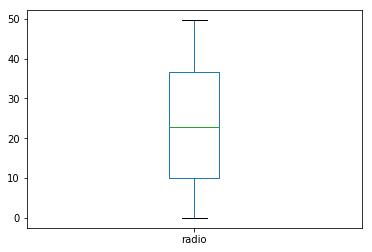

In [46]:
df['radio'].plot.box()

We cannot see any outliers in radio column as well

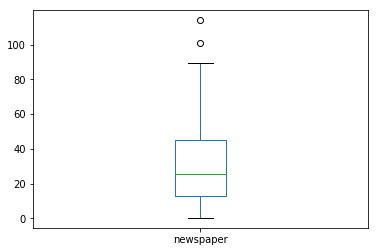

In [47]:
df['newspaper'].plot.box()

There are hardly few outliers in the newspaper column which can be of importance. So, we don't treat the column.

# Separating the column into x & y

In [48]:
x=df.drop('sales',axis=1)
y=df['sales']

# Resolving Skewness

In [49]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [50]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

# Model Building

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [52]:
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i}, the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuracy is: {r2_score(y_test,pred_test)}')
    print("\n")

At random state 0, the training accuracy is: 0.9129495390360743
At random state 0, the testing accuracy is: 0.8838865502815021


At random state 1, the training accuracy is: 0.9071938747219684
At random state 1, the testing accuracy is: 0.8962223515318661


At random state 2, the training accuracy is: 0.9183341288802332
At random state 2, the testing accuracy is: 0.8134661880809735


At random state 3, the training accuracy is: 0.9044922374546075
At random state 3, the testing accuracy is: 0.9176823268482114


At random state 4, the training accuracy is: 0.9058334490016561
At random state 4, the testing accuracy is: 0.8999332568068064


At random state 5, the training accuracy is: 0.9057996837685972
At random state 5, the testing accuracy is: 0.9111155103873196


At random state 6, the training accuracy is: 0.9031637800959937
At random state 6, the testing accuracy is: 0.9263228920019166


At random state 7, the training accuracy is: 0.9024328978288426
At random state 7, the testing ac

At random state 98, the training accuracy is: 0.8965618381654459
At random state 98, the testing accuracy is: 0.9374842321940753


At random state 99, the training accuracy is: 0.9011286161276886
At random state 99, the testing accuracy is: 0.9289415808839093




We can see that the best random state is 92 with training accuracy 0.879 and testing accuracy is 0.951

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=92)

In [54]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print("Predicted Happiness Score: ",pred)
print('actual Happiness Score: ',y_test)

Predicted Happiness Score:  [10.08874122 12.62859338  8.49205267 19.85676418 13.54666088 15.37828634
  7.28563214 12.10685865  7.01841977  3.48907991 12.70577685  8.8013323
 22.40038246 18.71444078 16.57134625 15.30154476 13.22708847 22.3195323
 23.38533925  6.17264436 11.82556974 20.48762695 16.720177   18.94102332
 10.77032781  7.30870071 20.7653396  19.6644119  16.82465322 10.18879396
 15.22652791 12.24715378 17.54446531 11.01537463  1.93909392 19.9677175
 15.07773875 23.6833401  14.02275991 16.97999066]
actual Happiness Score:  38     10.1
116    12.2
24      9.7
176    20.2
63     14.0
26     15.0
32      9.6
31     11.9
34      9.5
91      7.3
7      13.2
44      8.5
36     25.4
141    19.2
194    17.3
123    15.2
115    12.6
61     24.2
183    26.2
22      5.6
6      11.8
0      22.1
89     16.7
68     18.9
82     11.3
172     7.6
137    20.8
124    19.7
40     16.6
73     11.0
103    14.7
96     11.7
74     17.0
94     11.5
8       4.8
104    20.7
171    14.5
175    27.0
165   

In [55]:
lm.coef_

array([3.97110784, 2.74861146, 0.10832455])

In [56]:
lm.intercept_

13.91145651805378

In [57]:
#training score
lm.score(x_train,y_train)

0.8981521525334042

In [58]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.9815378034023159
Mean squared error: 2.0366391168088844
Root Mean squared error: 1.4271086562728448


As we see some error, we need to hyper tune our model to attain the best accuracy

In [59]:
print(r2_score(y_test,pred))

0.9340599933972584


We get our r2_score as 95%

# Cross Validation of the Model

In [60]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and r2 score for training is {train_accuracy} and accuracy for the testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.9042245206305917 and r2 score for training is -0.8685227435959488 and accuracy for the testing is -0.8828359697926738


At cross fold 3 the cv score is 0.9005133366024934 and r2 score for training is -0.8685227435959488 and accuracy for the testing is -0.8828359697926738


At cross fold 4 the cv score is 0.9010704953541404 and r2 score for training is -0.8685227435959488 and accuracy for the testing is -0.8828359697926738


At cross fold 5 the cv score is 0.8978060430607071 and r2 score for training is -0.8685227435959488 and accuracy for the testing is -0.8828359697926738


At cross fold 6 the cv score is 0.9020141622653224 and r2 score for training is -0.8685227435959488 and accuracy for the testing is -0.8828359697926738


At cross fold 7 the cv score is 0.8982025458270028 and r2 score for training is -0.8685227435959488 and accuracy for the testing is -0.8828359697926738


At cross fold 8 the cv score is 0.8958223041714928 and r2 score for training

Since the number of folds don't have such impact on the accuracy and cv_score. So cv=3 is selected.

By checking the training and testing score, we are handling the underfitting and overfitting problems.

# Regularization

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [62]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [63]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.9340609661837804

In [64]:
cv_score=cross_val_score(ls,x,y,cv=3)
cv_mean=cv_score.mean()
cv_mean

0.9005153729222973

# Ensemble Technique

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [66]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2 score: ',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=3)
rfc=rfscore.mean()
print("Cross Val Score: ",rfc*100)

R2 score:  97.91613539927464
Cross Val Score:  97.33746532277895


# Saving Model

In [67]:
import pickle
filename='advertising.pkl'
pickle.dump(rf,open(filename,'wb'))